## Coach Lab Linear Regression

### Objectives
*Put together a linear regression model <br>
*Understand the steps in modeling<br>
*Evaluate linear regression model


![caption](images/Model_Process_Part1.png)
![caption](images/Model_Process_Part2.png)

In [44]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### For this lesson we will use the computer hardware dataset from https://www.mldata.io/dataset-details/computer_hardware/

In [45]:
comp = pd.read_csv('computer_hardware_dataset.csv')

### Project Question Formulation


What do we want to evaluate/explore/answer????
- which of these feeatures are most significant in predicting PRP?
- which of these features is not linearly related to PRP?
- which features are related to one another? 
- which computer model has the best PRP?
- which features interact with other features in predicting PRP?

In [46]:
comp.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,adviser,32/60,125,256,6000,256,16,128,198
1,amdahl,470v/7,29,8000,32000,32,8,32,269
2,amdahl,470v/7a,29,8000,32000,32,8,32,220
3,amdahl,470v/7b,29,8000,32000,32,8,32,172
4,amdahl,470v/7c,29,8000,16000,32,8,16,132


In [47]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
vendor_name    209 non-null object
model_name     209 non-null object
MYCT           209 non-null int64
MMIN           209 non-null int64
MMAX           209 non-null int64
CACH           209 non-null int64
CHMIN          209 non-null int64
CHMAX          209 non-null int64
PRP            209 non-null int64
dtypes: int64(7), object(2)
memory usage: 14.8+ KB


In [48]:
comp.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMIN,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMAX,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PRP,209.0,105.622010,160.830733,6.0,27.0,50.0,113.0,1150.0


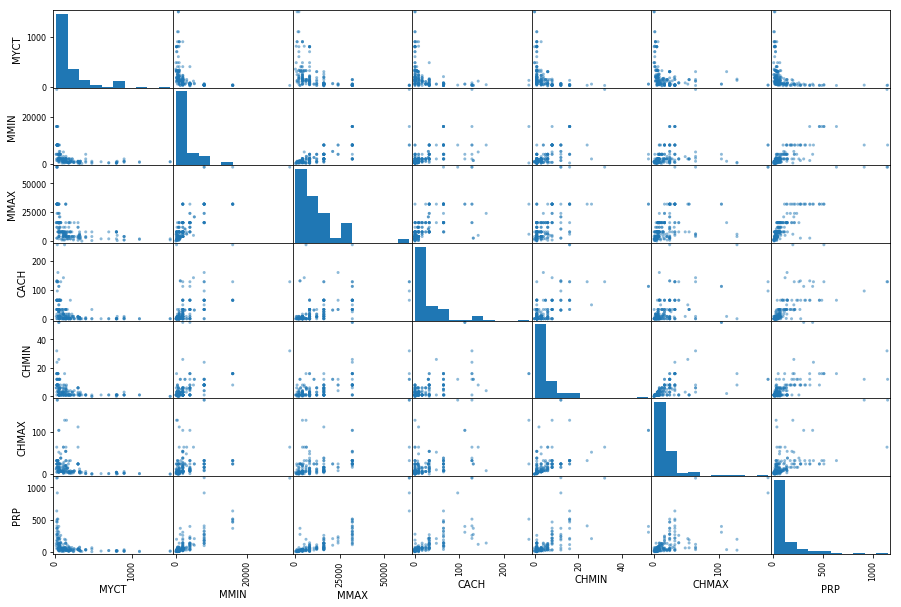

In [49]:
# to see everything togather
from pandas.plotting import scatter_matrix 
scatter_matrix(comp, figsize = (15,10))
plt.show()

### Step 1 Train/test Split
#### Target is PRP

In [50]:
# create y and X as the target and the features
y = comp['PRP'] # target variable 
X = comp.drop(columns=['PRP']) # features

In [51]:
#split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25) # matrix and vector 

In [52]:
#get shape of the training and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((156, 8), (156,), (53, 8), (53,))

### Step 2- Exploratory Data Analysis 

We will use only the training data for this part

#### As a first step in data cleaning lets look for missing values

In [53]:
X_train.columns

Index(['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX'], dtype='object')

In [54]:
X_train.vendor_name.nunique()

29

In [55]:
def drop_columns(data, features):
    return data.drop(columns=features)

In [56]:
X_train = drop_columns(X_train, 'model_name')
X_train.head()

,vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
29,c.r.d,320,256,5000,4,1,6
19,burroughs,110,5000,5000,142,8,64
135,magnuson,50,2000,16000,24,6,16
139,nas,115,2000,4000,2,1,5
66,hp,90,256,1000,0,3,10


In [58]:
X_train = drop_columns(X_train,'vendor_name')
X_train.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
29,320,256,5000,4,1,6
19,110,5000,5000,142,8,64
135,50,2000,16000,24,6,16
139,115,2000,4000,2,1,5
66,90,256,1000,0,3,10


#### Next let's look at the distribution of our variables

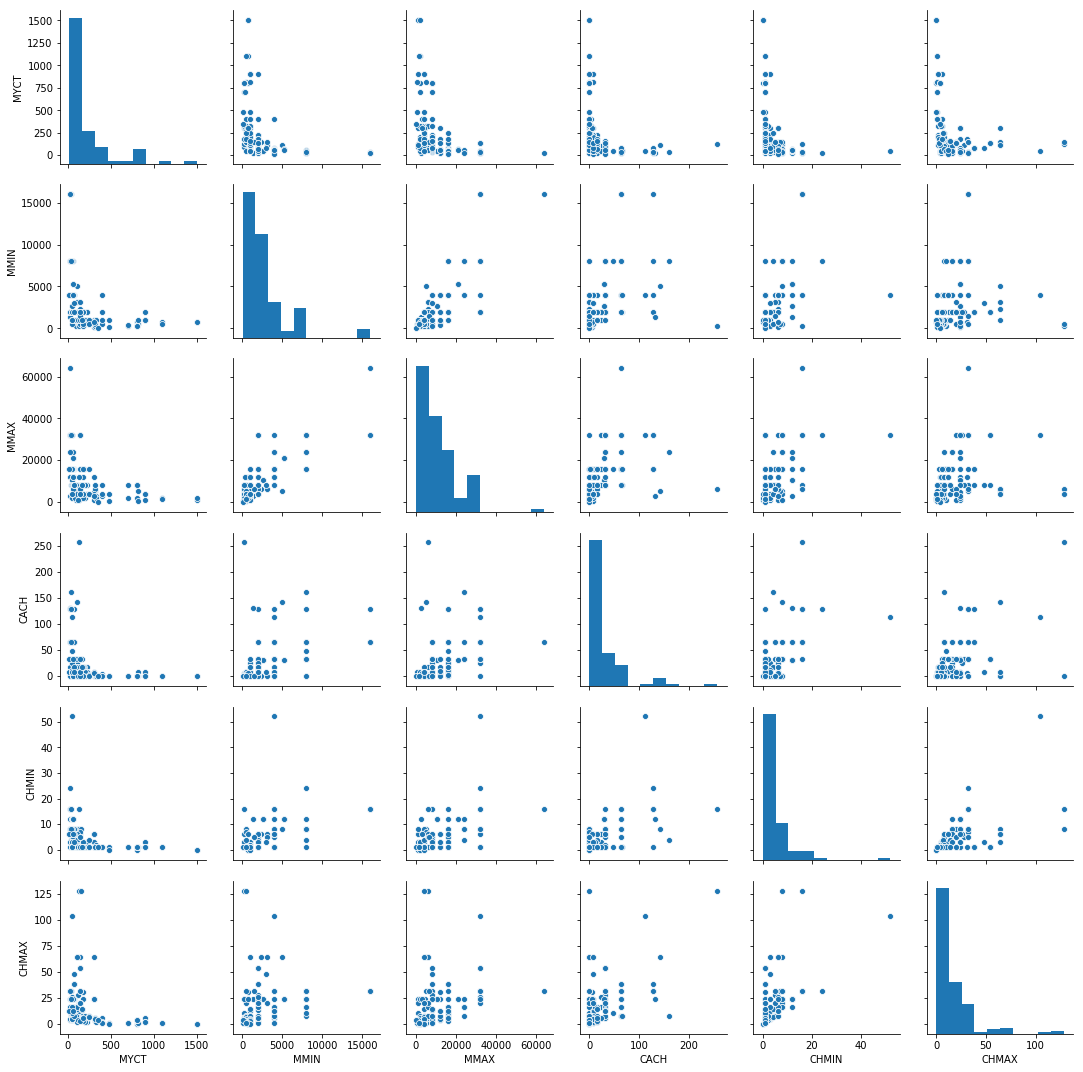

In [59]:
#create scatterplot matrix
sns.pairplot(X_train) # to plot and see all the columns as a grid 

#### Next let's look at the distribution of our target

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


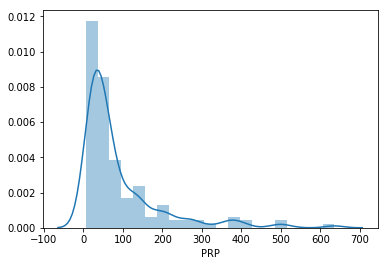

In [61]:
#histogram of y_train
sns.distplot(y_train)

(array([99., 22., 16.,  6.,  5.,  3.,  2.,  1.,  1.,  1.]),
 array([  6.,  69., 132., 195., 258., 321., 384., 447., 510., 573., 636.]),
 <a list of 10 Patch objects>)

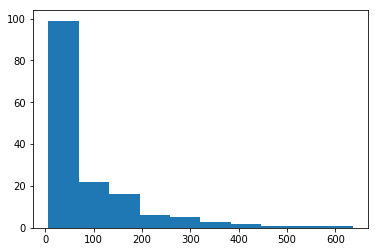

In [65]:
plt.hist(y_train)

#### Do we have any categorical variables we need to encode?

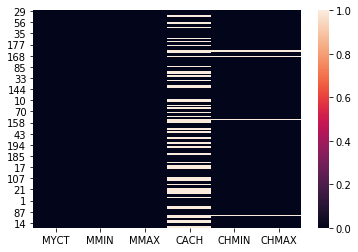

In [60]:
sns.heatmap(X_train==0) # to check for the zero values 

In [64]:
# create scatterplot matrix
X_train = pd.concat([X_train, X_train.loc[:,'MYCT':'MMAX'].applymap(np.log).add_suffix('_log')],axis=1)
X_train.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
29,320,256,5000,4,1,6,5.768321,5.545177,8.517193
19,110,5000,5000,142,8,64,4.700480,8.517193,8.517193
135,50,2000,16000,24,6,16,3.912023,7.600902,9.680344
139,115,2000,4000,2,1,5,4.744932,7.600902,8.294050
66,90,256,1000,0,3,10,4.499810,5.545177,6.907755


In [86]:
 df = pd.DataFrame({'Col1': [10, 20, 15, 30, 45],
                    'Col2': [13, 23, 18, 33, 48],
                    'Col3': [17, 27, 22, 37, 52]})

In [99]:
df

,Col1,Col2,Col3
0,10,13,17
1,20,23,27
2,15,18,22
3,30,33,37
4,45,48,52


In [110]:
df_new = pd.concat([df, df.loc[:,['Col1','Col3']].diff().add_suffix('_diff')],axis=1)
df_new = pd.concat([df_new,df.loc[:,['Col1','Col3']].applymap(np.log).add_suffix('_log')], axis=1)
df_new

,Col1,Col2,Col3,Col1_diff,Col3_diff,Col1_log,Col3_log
0,10,13,17,NaN,NaN,2.302585,2.833213
1,20,23,27,10.0,10.0,2.995732,3.295837
2,15,18,22,-5.0,-5.0,2.708050,3.091042
3,30,33,37,15.0,15.0,3.401197,3.610918
4,45,48,52,15.0,15.0,3.806662,3.951244


In [107]:
pd.concat([df,df.loc[:,['Col1','Col3']].applymap(np.log).add_suffix('_log')], axis=1)

,Col1,Col2,Col3,Col1_log,Col3_log
0,10,13,17,2.302585,2.833213
1,20,23,27,2.995732,3.295837
2,15,18,22,2.708050,3.091042
3,30,33,37,3.401197,3.610918
4,45,48,52,3.806662,3.951244


In [84]:
X_trean1 = X_train.copy()
X_trean1.loc[:,'MYCT':'MMAX']

,MYCT,MMIN,MMAX
29,320,256,5000
19,110,5000,5000
135,50,2000,16000
139,115,2000,4000
66,90,256,1000
65,75,2000,16000
5,26,8000,32000
146,60,4000,16000
56,220,1000,8000
97,26,8000,32000


#### Next let's scale our data

Why do we do this?  What does it mean about the comparability of our variables?  What about interpretation of coefficients?

#### Outlier Removal

### Step 4 - Messy Model

#### First let's use statsmodels

In [ ]:
#Linear regression using statsmodels


#### Now let's use sklearn

In [ ]:
#initialize a linear regression model in sklearn

In [ ]:
#fit linear model to training data

### Step 5 - Model Evaluation

In [ ]:
#get summary statistics from statsmodels


In [ ]:
#get r squared value from sklearn


In [ ]:
#create formula for adjusted r squared
def adjusted_r_suared(r_squared, num_samples, num_regressors):
    return 1 - ((1-r_squared)*(num_samples - 1) / (num_samples - num_regressors - 1))

In [ ]:
#calculate adjusted r squared
adjusted_r_suared()

#### What does the r-squared value mean? What do the r-squared values tell us about the fit of our model?  What about adjusted r-squared?

#### Now let's look at predictions of relative performance to compare to actual relative performance

In [ ]:
linreg_results_df = pd.DataFrame(linreg.predict(X_train), y_train).reset_index()

In [ ]:
linreg_results_df.columns = ['Actual_Price', 'Predicted_Price']

In [ ]:
linreg_results_df.head()

## Let's use regularization to see if that helps our model fit

In [ ]:
#importing Lasso and Ridge models from sklearn
from sklearn.linear_model import Lasso, Ridge

### Lasso Regularizer

In [ ]:
#conduct lasso regression on training data

In [ ]:
#Evaluation of lasso on training data

In [ ]:
#examine coefficients from lasso

### Ridge Regularizer

In [ ]:
#conduct ridge regression on training data

In [ ]:
#Evaluation of ridge on training data

In [ ]:
#examine coefficients from ridge

### Step 6 - Best Model Evaluation

In [ ]:
#apply data cleaning process to test set

In [ ]:
#run best model on test set

### Step 7 - Model Interpretation

What take-ways do we have?  Conclusions about our initial question?  Who would care?  Why do they care?